# Compressed Sensing Synthetic Data

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import os
import glob
import nibabel as nib

/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_files = np.asarray(glob.glob("/media/roberto/DATA/GDrive/MR-Data/CC-359/Original/Original/*_ge_3*.nii.gz"))
indexes = np.arange(data_files.size,dtype = int)
np.random.shuffle(indexes)
data_files = data_files[indexes]


print data_files[0]
print len(data_files)

/media/roberto/DATA/GDrive/MR-Data/CC-359/Original/Original/CC0312_ge_3_49_M.nii.gz
60


## Sample k-space and image reconstruction

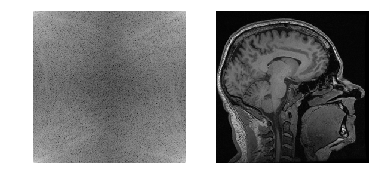

In [3]:
slice_index = 90
sample_rec = nib.load(data_files[0]).get_data().transpose(0,2,1)[:,::-1,:]
sample_kspace = np.fft.fft2(sample_rec)

plt.figure()
plt.subplot(121)
plt.imshow(np.log(1+np.abs(sample_kspace[slice_index])),cmap = 'gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(sample_rec[slice_index],cmap = 'gray')
plt.axis("off")
plt.show()